In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import keras
from keras import layers

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [4]:

# Load the data and split it between train and test sets

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [5]:
print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


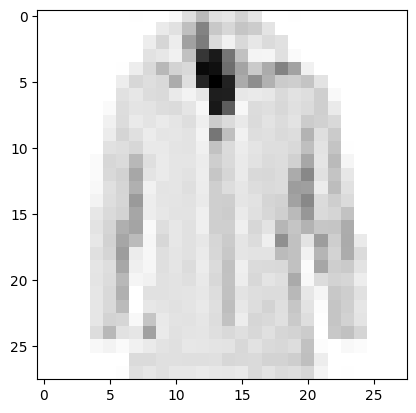

In [6]:
plt.imshow(x_train[19], cmap='Greys')

In [7]:
len(x_train[0][0])

28

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:


# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)

In [11]:
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation="softmax"),
    ]
)



In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [14]:
batch_size = 128
epochs = 25

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.15)

Epoch 1/25


399/399 [==============================] - 4s 9ms/step - loss: 0.6825 - accuracy: 0.7575 - val_loss: 0.4545 - val_accuracy: 0.8392
Epoch 2/25
399/399 [==============================] - 4s 9ms/step - loss: 0.4450 - accuracy: 0.8398 - val_loss: 0.3933 - val_accuracy: 0.8572
Epoch 3/25
399/399 [==============================] - 3s 9ms/step - loss: 0.3961 - accuracy: 0.8591 - val_loss: 0.3722 - val_accuracy: 0.8662
Epoch 4/25
399/399 [==============================] - 3s 9ms/step - loss: 0.3684 - accuracy: 0.8695 - val_loss: 0.3326 - val_accuracy: 0.8794
Epoch 5/25
399/399 [==============================] - 3s 9ms/step - loss: 0.3443 - accuracy: 0.8764 - val_loss: 0.3227 - val_accuracy: 0.8822
Epoch 6/25
399/399 [==============================] - 3s 9ms/step - loss: 0.3245 - accuracy: 0.8823 - val_loss: 0.3052 - val_accuracy: 0.8896
Epoch 7/25
399/399 [==============================] - 3s 9ms/step - loss: 0.3127 - accuracy: 0.8870 - val_loss: 0.2965 - val_accuracy: 0.8949
Epoc

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.25566864013671875
Test accuracy: 0.9072999954223633


In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
import seaborn as sns

In [18]:
# Predict the classes for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 3ms/step


In [19]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

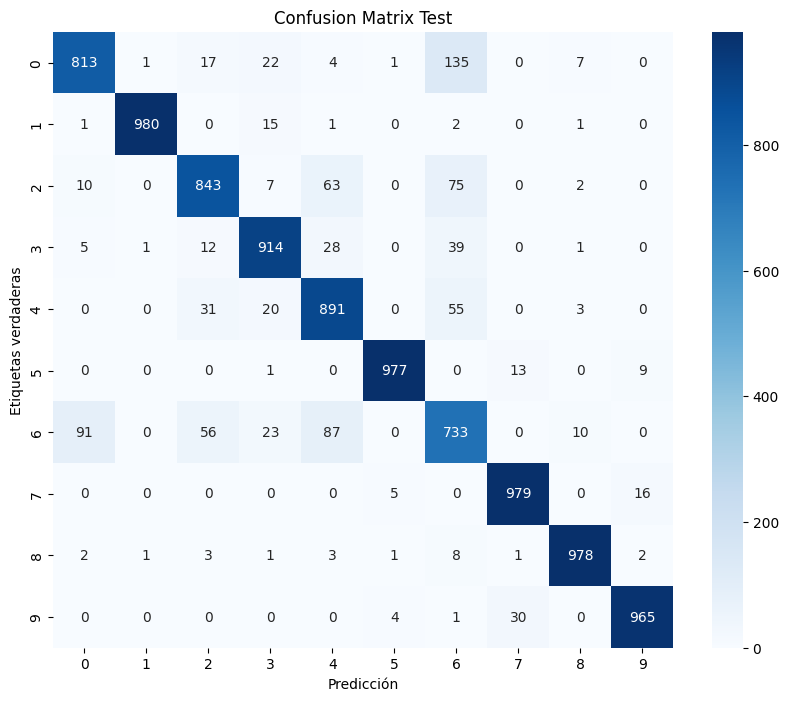

In [20]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicción')
plt.ylabel('Etiquetas verdaderas')
plt.title('Confusion Matrix Test')
plt.show()

In [21]:
# Compute precision and recall
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average=None)
recall = recall_score(y_true, y_pred_classes, average=None)
print("Accuracy:", accuracy)
print("Precision per class:", precision)
print("Recall per class:", recall)


Accuracy: 0.9073
Precision per class: [0.88177874 0.99694812 0.87629938 0.9112662  0.82729805 0.9888664
 0.69942748 0.95698925 0.9760479  0.97278226]
Recall per class: [0.813 0.98  0.843 0.914 0.891 0.977 0.733 0.979 0.978 0.965]


In [22]:
# Predict the classes for training set
y_train_pred = model.predict(x_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)

1875/1875 [==============================] - 4s 2ms/step


In [23]:
# Compute confusion matrix for training set
conf_matrix_train = confusion_matrix(np.argmax(y_train, axis=1), y_train_pred_classes)

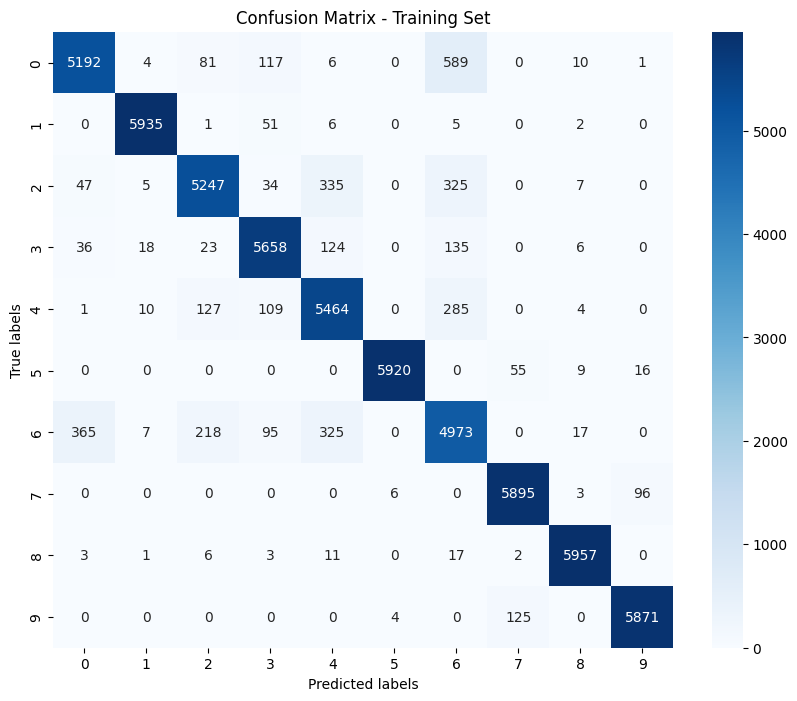

In [24]:

# Plot confusion matrix for training set
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Training Set')
plt.show()

In [25]:
y_train_pred = np.argmax(model.predict(x_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)

1875/1875 [==============================] - 4s 2ms/step


In [26]:
accuracy = accuracy_score(y_train_true, y_train_pred)
precision = precision_score(y_train_true, y_train_pred, average=None)
recall = recall_score(y_train_true, y_train_pred, average=None)



In [27]:
print("Accuracy:", accuracy)
print("Precision per class:", precision)
print("Recall per class:", recall)

Accuracy: 0.9352
Precision per class: [0.91991495 0.99247492 0.92004208 0.93258612 0.87131239 0.99831366
 0.78574814 0.97005101 0.99035744 0.98111631]
Recall per class: [0.86533333 0.98916667 0.8745     0.943      0.91066667 0.98666667
 0.82883333 0.9825     0.99283333 0.9785    ]
